In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

import yaml
from model_data import get_model_data, get_relevant_countries, get_label, split_features, normalize_but_country
from unified import *
import pycountry

# LSTM network for R0 prediction

##### Available features

In [2]:
with open('model_features.yaml', 'r') as file:
    features = yaml.load(file, Loader=yaml.FullLoader)

features_epi = features['epi']
features_demography = features['demography']
features_sanitary = features['sanitary']
features_continent = features['continent']
features_mobi_google = features['mobi_google']
features_mobi_apple = features['mobi_apple']
features_mobility = features_mobi_google + features_mobi_apple
features_weather = features['weather']
weekdays = features['weekdays']
policies = features['policies']

### Selection of target

In [3]:
target_col = 'shifted_r_estim'

### Selection of input features

In [4]:
train_cols = (
#     features_epi +
    features_demography +
    features_sanitary +
#     features_continent +
    features_weather +
              
#     features_mobility +
#     features_mobi_apple +
    features_mobi_google +
              
      ['stringency'] +
      policies
              
#     ['weekday'] +
#     weekdays
#     ['epi_progress'] +
#     ['epi_progress_rel']
#     ['shifted_r_estim_diff']
#     ['epi_progress_rel_log']
)

In [5]:
#train_cols = [c for c in train_cols if get_label(c) != "human development index"]

print('Input features:\n')
for train_col in train_cols:
    print('\t-', get_label(train_col))

Input features:

	- population density
	- median age
	- aged 65 or older
	- aged 70 older
	- gdp per capita
	- human development index
	- diabetes prevalence
	- life expectancy
	- pressure
	- retail and recreation
	- grocery and pharmacy
	- parks
	- transit stations
	- workplaces
	- residential
	- stringency
	- school closing
	- workplace closing
	- cancel public events
	- gathering size restrictions
	- close public transport
	- home confinement orders
	- internal movement restrictions
	- international travel restrictions
	- h6 level


### Selection of countries

In [6]:
relevant_countries = get_relevant_countries()
max_r = 4
data = get_model_data(train_cols, target_col, dropna=True, normalize=False, max_r=max_r)
data = data[data.iso_code.isin(relevant_countries)]

iso_code_list = data.iso_code.unique()

print('Considered countries for the training ({} countries):\n'.format(len(iso_code_list)))
for iso_code in iso_code_list:
    country = pycountry.countries.get(alpha_3=iso_code)
    print('\t-', country.name)
    
train_cols_constant, train_cols_variable = split_features(train_cols, data)

Considered countries for the training (95 countries):

	- Afghanistan
	- Angola
	- Argentina
	- Australia
	- Austria
	- Bahrain
	- Bangladesh
	- Belarus
	- Belgium
	- Belize
	- Bolivia, Plurinational State of
	- Bosnia and Herzegovina
	- Botswana
	- Brazil
	- Bulgaria
	- Cameroon
	- Canada
	- Cabo Verde
	- Chile
	- Colombia
	- Costa Rica
	- Côte d'Ivoire
	- Czechia
	- Denmark
	- Dominican Republic
	- Ecuador
	- Egypt
	- El Salvador
	- Finland
	- France
	- Gabon
	- Germany
	- Ghana
	- Greece
	- Guatemala
	- Haiti
	- Honduras
	- Hungary
	- India
	- Indonesia
	- Iraq
	- Ireland
	- Israel
	- Italy
	- Japan
	- Kazakhstan
	- Kenya
	- Kuwait
	- Kyrgyzstan
	- Lebanon
	- Libya
	- Luxembourg
	- Malaysia
	- Mali
	- Mexico
	- Moldova, Republic of
	- Morocco
	- Mozambique
	- Nepal
	- Netherlands
	- Nicaragua
	- Nigeria
	- Norway
	- Oman
	- Pakistan
	- Panama
	- Paraguay
	- Peru
	- Philippines
	- Poland
	- Portugal
	- Qatar
	- Romania
	- Russian Federation
	- Saudi Arabia
	- Senegal
	- Singapore
	- 

### UI function Show case

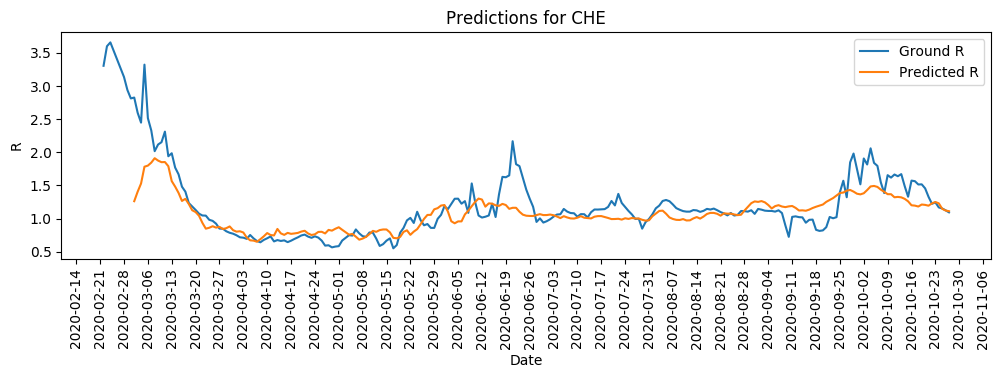

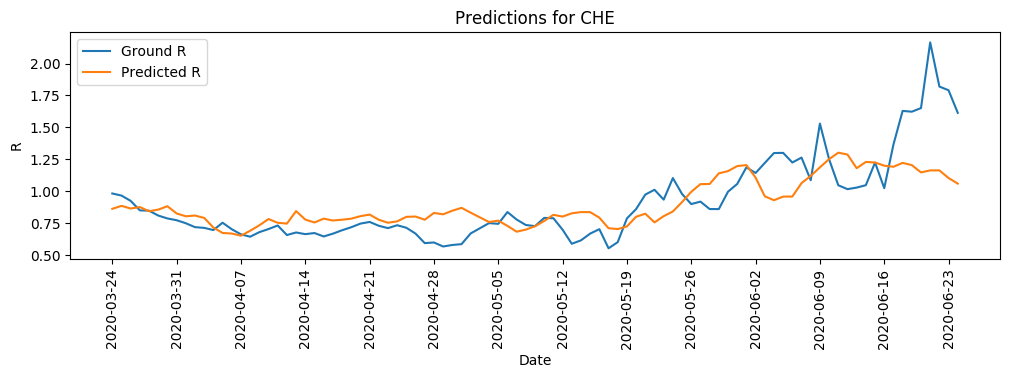

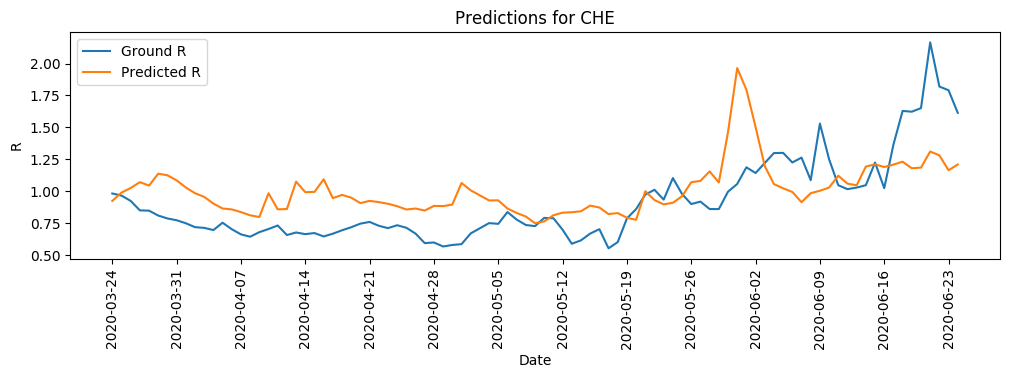

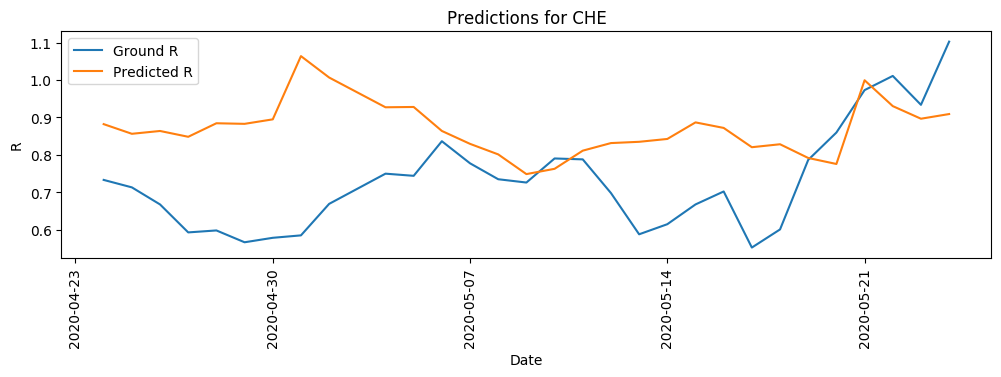

0.16609749279080685

In [16]:
country = "CHE"

# First load call, all dates
_, (pv, tv, d, p), update_func  = load(country, None, None)
plot_results(p, tv, d, country, plot_error=False)

# Second load call, date interval
_, (pv, tv, d, p), update_func  = load(country, '03.24.2020', '06.24.2020')
plot_results(p, tv, d, country, plot_error=False)

# First update, same dates different policies
pv['c1_level'] *= 0
pv['c2_level'] *= 0
pv['c3_level'] *= 0
p, tv, d = update_func(country, '03.24.2020', '06.24.2020', pv, None)
plot_results(p, tv, d, country, plot_error=False)

# Second update, different dates same policies
p, tv,d = update_func(country, '04.24.2020', '05.24.2020', None, None)
plot_results(p, tv, d, country, plot_error=False)

### Pytorch Hybrid Lightning

/home/thity27/anaconda3/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning:

Checkpoint directory ./models/CHE exists and is not empty. With save_top_k=1, all files in this directory will be deleted when a checkpoint is saved!

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


/home/thity27/anaconda3/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning:

The validation_epoch_end should not return anything as of 9.1.to log, use self.log(...) or self.write(...) directly in the LightningModule



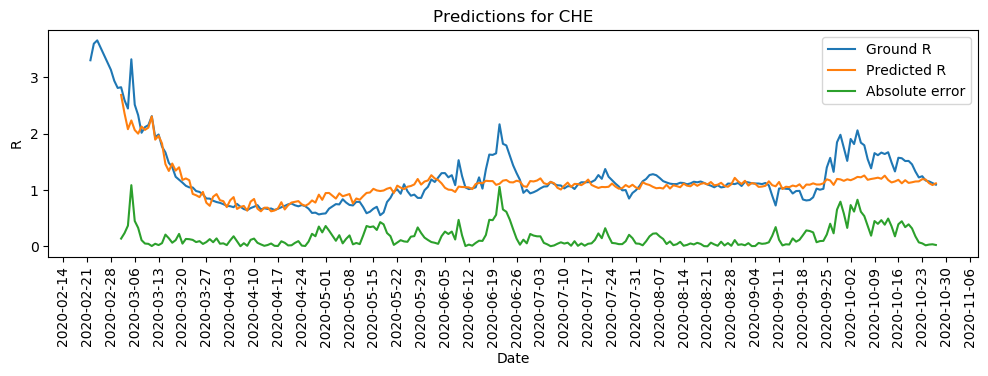

0.16776913571994004

In [102]:
model_country(data, train_cols, target_col, 'CHE', train_cols_constant)

In [ ]:
model_all_countries(data, train_cols, target_col, train_cols_constant)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


/home/massemin/.local/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The validation_epoch_end should not return anything as of 9.1.to log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type    | Params
-------------------------------------
0 | lstm_1   | LSTM    | 1 K   
1 | lstm_2   | Dropout | 0     
2 | linear_1 | Linear  | 120   
3 | linear_2 | ReLU    | 0     
4 | linear_3 | Dropout | 0     
5 | mixed_1  | Linear  | 31    
6 | mixed_2  | ReLU    | 0     
